In [12]:
from gql import gql,Client
from gql.transport.requests import RequestsHTTPTransport
#this is the final file

In [13]:
sample_transport=RequestsHTTPTransport(
    url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
    verify=True,
    retries=5,
)
client = Client(
transport = sample_transport
)


In [14]:
liquidity = []
volumecheck = []
transactions = []
ids = []
#instead of relying simply on the query data, I have stored it in a list format.
count = 11176855


In [ ]:
while count > 11150000:
    query = gql('''
    query {
    uniswapFactory(id:"0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f",block: {number: '''+str(count)+'''}){
    id
    totalLiquidityUSD
    totalVolumeUSD
    totalLiquidityETH
    txCount
    
    }
    }''')
    data = client.execute(query)
    print(data)
    #print('hello')
    val_1 = data['uniswapFactory']['totalLiquidityUSD']
    val_2 = data['uniswapFactory']['totalVolumeUSD']
    val_3 = data['uniswapFactory']['txCount']
    val_4 = data['uniswapFactory']['id']
    ids.append(val_4)
    liquidity.insert(0, float(val_1))
    volumecheck.append(float(val_2))
    transactions.append(float(val_3))
    count=count-1000
#Uniswap V2 contract = 0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f

{'uniswapFactory': {'id': '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f', 'totalLiquidityETH': '7687352.705766105698783970978388102', 'totalLiquidityUSD': '2957380793.284943717822129060826425', 'totalVolumeUSD': '30897315417.91030182876464939243116', 'txCount': '15533853'}}
{'uniswapFactory': {'id': '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f', 'totalLiquidityETH': '7598999.782976179797019296175705879', 'totalLiquidityUSD': '3018270205.81105963883066008392565', 'totalVolumeUSD': '30851460891.06438030009225897217266', 'txCount': '15511955'}}
{'uniswapFactory': {'id': '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f', 'totalLiquidityETH': '7563412.882612540632761661465580597', 'totalLiquidityUSD': '3036032113.807759929570138156459647', 'totalVolumeUSD': '30824262300.86471261581668201055476', 'txCount': '15490852'}}
{'uniswapFactory': {'id': '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f', 'totalLiquidityETH': '7620234.333329314946107662191804111', 'totalLiquidityUSD': '3011488356.90479648506266810

In [11]:
#data = client.execute(query)
print(liquidity)
print(volumecheck)
print(transactions)
print(ids)
print(len(liquidity))
print(len(volumecheck))
print(len(transactions))

[2929246392.5788503, 2908095219.8642735, 2964845829.648649, 2947820265.311983, 2923788052.7512226, 2916105615.942122, 2862498234.52981, 2855616493.0895367, 2870295614.8156104, 2892211706.0773616, 2908203365.3940687, 2921909233.8632965, 2906120592.872515, 2940503222.3827558, 3023270277.8155847, 3000713497.3060565, 2983464236.607134, 2993736112.373585, 2990886667.151013, 2991244473.257546, 2990217245.6162996, 2968253121.7446895, 2976583250.6277285, 3011488356.9047966, 3036032113.80776, 3018270205.8110595, 2957380793.2849436]
[30897315417.9103, 30851460891.06438, 30824262300.86471, 30779352063.363792, 30744124581.889977, 30716707051.598354, 30700899816.336716, 30680284598.355118, 30658471138.198246, 30638583515.10467, 30618444602.072582, 30583493417.646374, 30550694580.912003, 30512870330.511112, 30471504744.453636, 30441073155.896294, 30400061062.374744, 30363418410.015263, 30317945946.77253, 30276270889.90159, 30210041140.851753, 30158164192.325924, 30086136877.257935, 30054417814.22412

In [67]:
import numpy as np
import pandas as pd

In [68]:
import matplotlib.pyplot as plt

In [69]:
df = pd.DataFrame(data)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, id to txCount
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   uniswapFactory  5 non-null      object
dtypes: object(1)
memory usage: 80.0+ bytes
None
                                               uniswapFactory
id                 0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f
totalLiquidityETH         7098175.127982260102346545541858265
totalLiquidityUSD         3328232968.707095905815088957839271
totalVolumeUSD            33778693576.40070351318113153093614
txCount                                              17039084


In [70]:
df.uniswapFactory = df.uniswapFactory.fillna({i: {} for i in df.index})
#df.uniswapFactory = df.uniswapFactory.apply(literal_eval)

In [71]:
print(df)

                                               uniswapFactory
id                 0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f
totalLiquidityETH         7098175.127982260102346545541858265
totalLiquidityUSD         3328232968.707095905815088957839271
totalVolumeUSD            33778693576.40070351318113153093614
txCount                                              17039084


In [72]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib as plt
import matplotlib.pyplot as plt

In [73]:
cummulative_list = pd.DataFrame({'ID':ids,'Liquidity':liquidity,'Volume':volumecheck,'Transactions':transactions})
print(cummulative_list)

                                            ID     Liquidity        Volume  \
0   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.328233e+09  3.504960e+10   
1   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.340317e+09  3.497488e+10   
2   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.343311e+09  3.493503e+10   
3   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.322655e+09  3.489819e+10   
4   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.287652e+09  3.486010e+10   
5   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.266161e+09  3.473540e+10   
6   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.286684e+09  3.469197e+10   
7   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.292708e+09  3.462357e+10   
8   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.310372e+09  3.457616e+10   
9   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.296576e+09  3.454824e+10   
10  0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.289316e+09  3.450954e+10   
11  0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.273557e+09  3.

In [74]:
cummulative_list['cum_sum'] = cummulative_list['Liquidity'].cumsum()
cummulative_list['check'] = range(1,len(cummulative_list['Liquidity'])+1)
cummulative_list['Liquidity'] = pd.to_numeric(cummulative_list['Liquidity'])
cummulative_list['Moving Average'] = cummulative_list['cum_sum'] / cummulative_list['check']
cummulative_list['Rolling Mean'] = cummulative_list['Liquidity'].rolling(window = 3).mean()
print(cummulative_list)
#the difference in the moving averga and the rolling mean comes into play because for rolling mean we consider a window of 3
#wheras for moving average no such window is seen

                                            ID     Liquidity        Volume  \
0   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.328233e+09  3.504960e+10   
1   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.340317e+09  3.497488e+10   
2   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.343311e+09  3.493503e+10   
3   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.322655e+09  3.489819e+10   
4   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.287652e+09  3.486010e+10   
5   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.266161e+09  3.473540e+10   
6   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.286684e+09  3.469197e+10   
7   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.292708e+09  3.462357e+10   
8   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.310372e+09  3.457616e+10   
9   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.296576e+09  3.454824e+10   
10  0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.289316e+09  3.450954e+10   
11  0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.273557e+09  3.

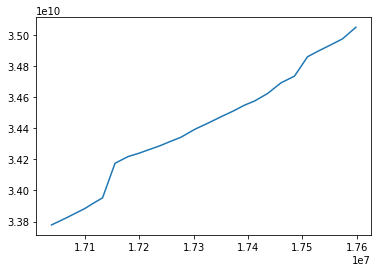

In [75]:
#plt.plot(cummulative_list['Liquidity'],cummulative_list['Rolling Mean'])
#plt.plot(cummulative_list['Rolling Mean'],cummulative_list['Moving Average'])
plt.plot(cummulative_list['Transactions'],cummulative_list['Volume'])
#the relation between the transactions and the liquidity for the uniswap-v2 pool

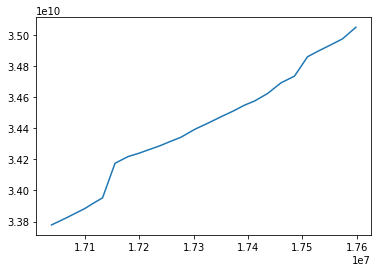

In [76]:
plt.plot(cummulative_list['Transactions'],cummulative_list['Volume'])
